# House Rent Analysis

## 1-Kütüphaneleri çağırma

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
import warnings
warnings.filterwarnings("ignore")

Öncelikle pandas, numpy seaborn ve matplotlib kütüphanelerini çağırarak başlıyoruz.

## 2- Veri Setini Çağırma ve Veri Setine Genel Bakış

Ardından "read_csv" yardımıyla veri setimizi okuyoruz. Ve veri setimizi göz atıyoruz.

In [113]:
df_rent= pd.read_csv("House_Rent_Dataset.csv")
df_rent

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


Görüldüğü üzere elimizde 4746 satır, 12 sütundan oluşan bir veri seti bulunuyor.

In [114]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [115]:
df_rent.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


info fonksiyonu yardımıyla gebel bilgilere ulaşabildik. Değişkenlerimizin tipleri, ve eksik değer olup olmayadığı gözlemleniyor. Görülene göre eksik veri bulunmuyor fakat eksik veri tespiti için verimizi yine de detaylı inceleyeceğiz. 

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

## 3-Eksik Veri
### Eksik Veri Var Mı?

Eksik veri bulunmamaktadır.

In [116]:
df_rent.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### __Aritmetik Ortalamaları Hesaplayalım__

Aritmetik ortalamalara bakmak için Pandas’ın mean fonksiyonunu kullandık.

In [117]:
df_rent.mean(numeric_only=True)

BHK             2.083860
Rent        34993.451327
Size          967.490729
Bathroom        1.965866
dtype: float64

Kiraların ortalaması 35000 hindistan rupisi. Bugünün kuruna göre de 440 dolar etmekte."Demek ki Hindistanda ev kiralayabilmek için yaklaşık olarak 450 dolara ihtiyacımız var." Sizce bunu demek bu kadar kolay mı? Kira miktarını belirlemek için hangi değişkenleri göz önünde bulundurmamız gerekiyor? Evin oda sayısı,banyo sayısı ve kaç metrekare olduğu bilgisi fiyatı değiştiren etkenlerden değil midir?

Evlerin boyutlarını incelediğimizde ortalamasının 1000e yakın olduğunu görüyoruz. Eğer biz de Hindistanda kiralamak için ev arasaydık demek ki sadece 950-1000 metrekarelik evler bulup onları mı kiralayabilirdik? Daha küçük veya daha büyük evler bulamaz mıydık?

 Aritmetik ortalama önemlidir evet ama yeterli midir?

Aritmetik ortalama sadece dağılışların yerlerini belirler ve aykırı değerlerden çok kolay etkilenir. Aritmetik ortalaması aynı olan iki veri kümesinde verilerin dağılımı birbirinden çok farklı olabilir. İşte bu yüzden aritmetik ortalama tek başına yeterli değildir. Dağılışların nasıl bir yaygınlığa göre dağıldığına bakmak için aritmetik ortalama ile beraber standart sapma kullanılır.

In [118]:
df_rent["Rent"].std()

78106.41293734881

Kiraların standart sapması 78000 Hindistan rupisi.

Standart sapma ortalamaya ne kadar yakın olursa veriler o kadar dağınık dağılmış demektir. Ortalamamız 35000’di, standart sapmamız ise 78000. Neredeyse sapma, ortalamanın %45i. Yani veriler birbirine yakın dağılım göstermiş.

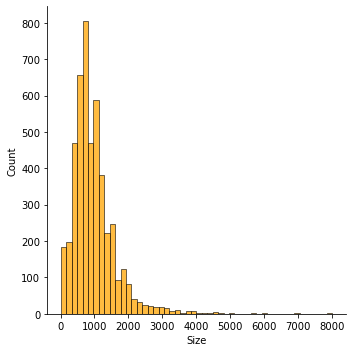

In [119]:
sns.displot(data= df_rent , x="Size" ,color="orange" , bins=50);

Grafik incelemeden önce çoğunlukla metrekarenin 1000e yakın olduğunu düşünüyorduk. Grafiğe baktığımızda tap yapan sütunun 900 ile 1000 arası olduğu gözleniyor diyebilir miyiz?

Sayıları az da olsa 6000/7000/8000 metrekare evler de bulunuyor ve bunlar sapmayı değiştirmede söz sahibi olmuş oluyor. Evet ortalama olarak metrekare 950 ile 1000 metrekare arasında fakat 8000 metrekarelk de evler bulunuyor. O yüzden sadece 1000 metrekare civarı evler bulacağımızı düşünmek doğru değil. Daha geniş ya da daha küçük kiralık ev bulabiliriz.

Grafiği incelediğimizde verilerin oldukça heterojen dağılım gösterdiğini gözlemlemekteyiz. 7000-8000 metrekarelik evlerin sayısı oldukça az fakat grafiğin yayılımını bozabiliyor.

Tanımladığımız matplotlib kütüphanesi yardımıyla grafiğimizin aralığını belirledik ve daha iyi bir şekilde gözlemledik. Yukarıda tap noktasının 950 ile 1000 arası olduğunu söylemiştik fakat grafiği büyüttüğümüzde bu tezimizin de yanlış olduğunu görüyoruz.


Size Mean: 967.4907290349768
Size Std: 634.2023275120648


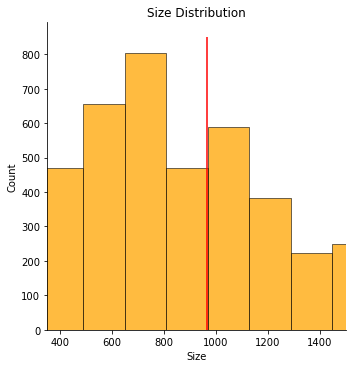

In [120]:
size_mean=df_rent["Size"].mean()
size_std=df_rent["Size"].std()

print("Size Mean:" , size_mean)
print("Size Std:" , size_std)

sns.displot(data= df_rent , x="Size" ,color="orange" , bins=50);
plt.xlim([350,1500])
plt.title("Size Distribution")
plt.vlines(size_mean , 0 , 850 , color="red")       
plt.show()

Bu grafikte önce Size değişkeninin ortalamasını ve standart sapmasını hesaplıyoruz. size değişkenini de 350-1500 arasında sınırlyoruz. "title" ile grafiğimize başlık ekliyoruz. "vlines" ile de ortalamayı grafik üzerinde gösteriyoruz.

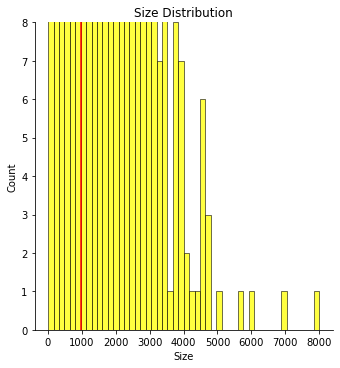

In [121]:
size_mean=df_rent["Size"].mean()
sns.displot(data= df_rent , x="Size" ,color="yellow" , bins=50);
plt.ylim([0,8])
plt.title("Size Distribution")
plt.vlines(size_mean , 0 , 850 , color="red")       
plt.show()

İlk grafikte yorum yaparken 6000-7000-8000 metrekarelik evlerin olduğunu fakat sayılarının oldukça az olduğunu söylemiştik.Evlerin sayısını grafikte daha detaylı gözlemlemek için yine matplotlib'den yararlandık.5000/6000/7000/8000 metrekare olan evlerden birer adet bulunmaktadır.

__Yani toparlayacak olursak ortalamamızın az sayıda aykırı değişkenden bile ne kadar etkilendiğini, Ortalamanın 970 iken Standart sapmanın 635 olduğunu gözlemliyoruz.__

std: 0.8322558984634506


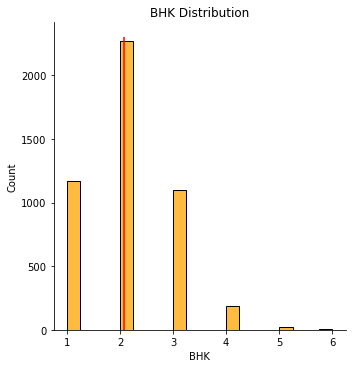

In [122]:
BHK_mean=df_rent["BHK"].mean()
BHK_std=df_rent["BHK"].std()

print("std:" , BHK_std)

sns.displot(data= df_rent , x="BHK" ,color="orange" , bins=20);
plt.title("BHK Distribution")
plt.vlines(BHK_mean , 0 , 2300 , color="red")       
plt.show()

## Korelasyon

Korelasyon değişkenlerimiz arasındaki oran diyebiliriz. oranlar -1 ve 1 arasında çıkar. -1 negatif ilişki , 1 pozitif ilişki ,0 ilişki yok demektir.

Korelasyonu bulmak için corr() fonksiyonunu kullanıyorum.

In [123]:
df_rent.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


Bizim daha fazla değişkenimiz varken neden burada 4 değişken gözüküyor?

Çünkü korelasyon __kategorik__ değişkenlerde hesaplanamaz.

In [124]:
df_rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Peki bu kategorik değişkenler hangileri?

Floor , Area Type , City , Furnishing Status , Tenant Prefered ve Point of Contact

Kiranın hangi değişkenlere bağlı olarak ne kadar değiştiğini hesaplamak istiyoruz. O yüzden kategorik değişkenleri göz ardı edemeyiz. Çünkü en az size kadar bulunduğu katın , bulunduğu şehrin ve eşyalı olup olmama durumunun da kira fiyatında etkisi olacağını öngörüyoruz.

Korelasyonda da hesaplayabilmek için __kategorik değerler değil nümerik değer__ olmalıdır.Korelasyonda yalızca nümerik değerleri inceleyeceğim. Ardından görselleştirme yardımıyla da kategorik değişkenlere göz atacağım.

"Posted On" ve "Area Locality" değişkenlerini analizimde kullanmayacağım için siliyorum.

In [125]:
df_rent = df_rent.drop("Posted On", axis=1)
df_rent = df_rent.drop("Area Locality", axis=1)
df_rent.head().T

,0,1,2,3,4
BHK,2,2,2,2,2
Rent,10000,20000,17000,10000,7500
Size,1100,800,1000,800,850
Floor,Ground out of 2,1 out of 3,1 out of 3,1 out of 2,1 out of 2
Area Type,Super Area,Super Area,Super Area,Super Area,Carpet Area
City,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata
Furnishing Status,Unfurnished,Semi-Furnished,Semi-Furnished,Unfurnished,Unfurnished
Tenant Preferred,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors
Bathroom,2,1,1,1,1
Point of Contact,Contact Owner,Contact Owner,Contact Owner,Contact Owner,Contact Owner


In [126]:
df_rent.corr()

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


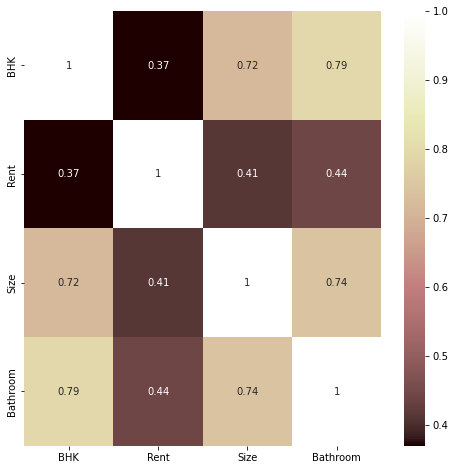

In [127]:
plt.figure(figsize = (8,8))
sns.heatmap(df_rent.corr() , cmap="pink" , annot=True);

Yukarıda değişkenlerin anlamlarını yazmıştım fakat tekrardan açıklamakta fayda var. "BHK" değişkenimiz evin kaç odası olduğunu belirtiyor , "Rent" değişkenimiz kira miktarını , "Size" değişkenimiz evin genişliğini , "Bathroom" değişkeni ise banyo sayısını belirtiyor. 

(Eğer oran 0 ise hiç ilişki yok , 1 ise doğrudan ilişki var demektir.)

1. Tabloyu incelediğimizde en yüksek oranın BHK-Bathroom arasındaki 0.79 olduğunu görüyoruz.

Tahmin edilebileceği gibi oda sayısı artınca banyo sayısı da artış gösteriyor. 5 odalı bir evin 1 banyosu olamayacağına göre ne kadar fazla oda o kadar çok banyo sayısı dememktir. Bu oran bizi şaşırtmıyor.

2. Bir diğer yüksek oranımızın Size-Bathroom arasındaki 0.74'lük oran.

Büyükçe metrekareler bu evde yaşayan geniş aileleri getiriyor önümüze. Geniş ailelerde de ihtiyaç doğrultusunda banyo sayısı artış gösteriyor haliyle. Keza en az 0.79 gibi büyük bir oran olan 0.74 bizi yine şaşırtmıyor.

3. Bir sonraki yüksek oranımız ise 0.72 ile Size-BHK.

Bu ilişkiyi de  tahmin etmek bizim için zor olmasa gerek. Yukarıda bahsettiğimiz bütün yorumlar bu oran için de geçerliliğini gösteriyor. Sayıca fazla odalı evler büyük metrekareleri, dolayısıyla bu geniş evlerde yaşayan geniş aileleri önümüze getiriyor.

__Yani özetle BHK-Size-Bathroom değişkenleri birbirleriyle bağlantı içerisinde. Aralarında doğru orantı var.__

### Görselleştirme

In [128]:
df_rent["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [129]:
df_rent["City"].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [130]:
df_rent["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [131]:
df_rent["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [132]:
df_rent["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

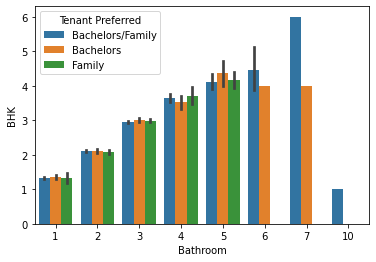

In [133]:
sns.barplot(x = "Bathroom" , y="BHK" , hue="Tenant Preferred" , data=df_rent);

Şimdiki amacım ise Kategorik değişkenlerin "Rent" yani kira üzerindeki etkisini incelemek. 

Bunu incelemek için Col_cat adında bir liste oluşturuyorum ve "Area Type" , "Furnishing Status" , "Tenant Preferred" , "Point of Contact" kategorik değişkenlerini listeye kaydediyorum. Ardından da hepsinin sırayla kira ile ilişkisine bakıyorum.

In [134]:
Col_cat= df_rent[["Area Type" , "Furnishing Status" , "Tenant Preferred" , "Point of Contact"]]
Col_cat.head()

,Area Type,Furnishing Status,Tenant Preferred,Point of Contact
0,Super Area,Unfurnished,Bachelors/Family,Contact Owner
1,Super Area,Semi-Furnished,Bachelors/Family,Contact Owner
2,Super Area,Semi-Furnished,Bachelors/Family,Contact Owner
3,Super Area,Unfurnished,Bachelors/Family,Contact Owner
4,Carpet Area,Unfurnished,Bachelors,Contact Owner


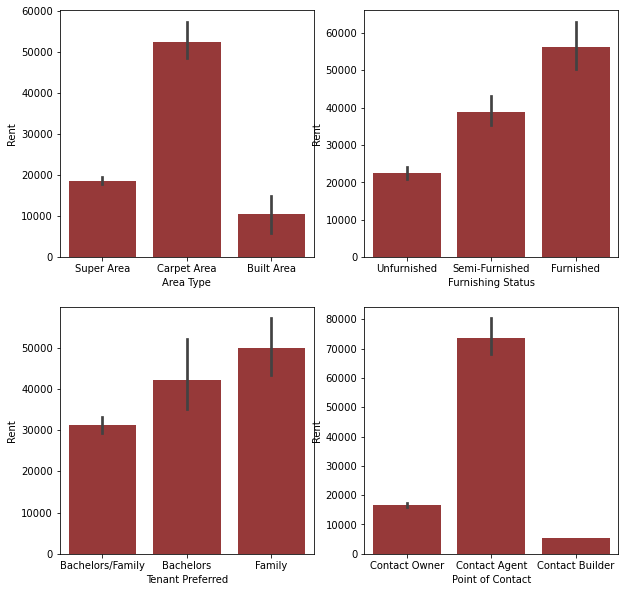

In [135]:
plt.figure(figsize= (10,10))
for i,col in enumerate(Col_cat):
    plt.subplot(2,2,i+1)
    sns.barplot(x=col, y="Rent", color="Brown" , data=df_rent);

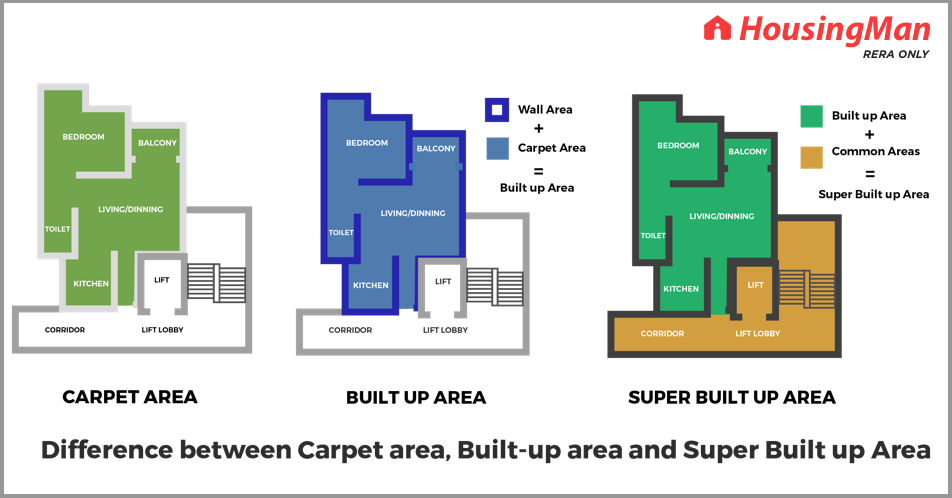

#### 1. Area Type-Rent grafiği

  Area Type dairenin zemin hakkında bilgi vermektedir. Daha iyi anlaşılması için yukaraıda sizinle bir görsel paylaştım. Üç ayrı tip bulunuyormuş ve verimizde de tüm seçenekler mevcut. En yüksek kiraya sahip olan area tipi carpet. Carpet areaya sahip daireler daha kullanışlı olduğu ve tercih edildiği için kira fiyatları __50000 hindistan rupisini__ geçiyor. Onun ardından Super area onu takip ederken, built areada ise kiralar 120 dolara tekabul ediyor ve diğerlerine göre çok daha düşük kalıyor. Tabii ki kira fiyatındaki tek etken area type değil. 


#### 2. Furnishing Status-Rent Grafiği
   
  Burada da dairenin eşya durumunu inceliyoruz. Furnished eşyalı evleri kastederken unfurnished ise eşyasız evleri kastediyor. Üçüncü türümüz olan Semi-Furnished ise yarı eşyalı evleri kastediyor. Yani mutfak eşyalarından olan fırın/ocak/bulaşık makinesi, kombi gibi eşyalara sahip olan evler. Grafikte de görüyoruz ki eşyalı dairelerin kiraları __60000 Hindistan rupisine__ yaklaşmakta. Yarı eşyalıların kira fiyatı 40000 , eşyasız olanların kira fiyatı ise 20000 Hindistan rupisi civarında değişiyor.
 

#### 3. Tenant Preferred-Rent Grafiği

  Ailelere kiralanan evler fiyat olarak daha yüksek. Çünkü ailenin bir arada kalacağı evler metrekare olarak daha büyüktür ve dolayısıyla kiralar da daha fazladır diyebilir miyiz? Peki hem bekar hem de aileye kiraya verilecek dairelerin kirası neden düşük? Bu grafiğe bakarak tam olarak bir yorum yapmamız doğru olmaz. Daha detaylı ve doğru bilgiye "Size" değişkenini yani metrekare bilgisini de işin içine katarak bakmak gerekir.
  
  
#### 4. Point of Contact

  Hindistanda ev kiralamak istiyorsanız inşaat firmasından kiralamak çok daha makul olacaktır. Demek yine çok doğru bir sonuç çıkarmayabilir.Çünkü kiraya verenler arasından kaçının inşaat firması olduğunu ve evlerin genişliğini,oda sayısını bilmeden direkt olarak yorum yapamayız.

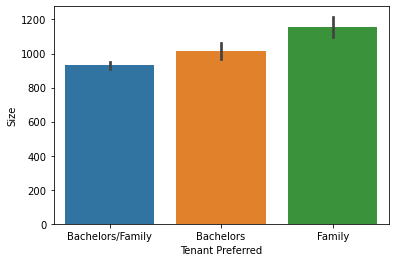

In [136]:
sns.barplot(y="Size", x="Tenant Preferred" ,  data=df_rent);

In [137]:
df_rent.groupby(["Tenant Preferred"])["Size"].mean()

Tenant Preferred
Bachelors           1015.109639
Bachelors/Family     930.271196
Family              1155.330508
Name: Size, dtype: float64

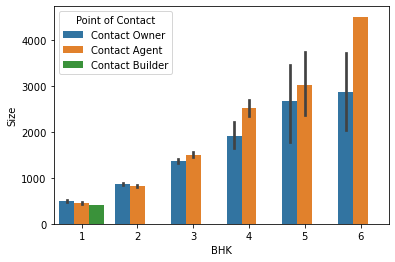

In [138]:
sns.barplot(x="BHK" , y="Size" , hue="Point of Contact", data=df_rent);

Görüldüğü üzere sadece inşaatçı firma tek odalı evlerde satış yapıyor.

### __City Değişkenini İnceleme__

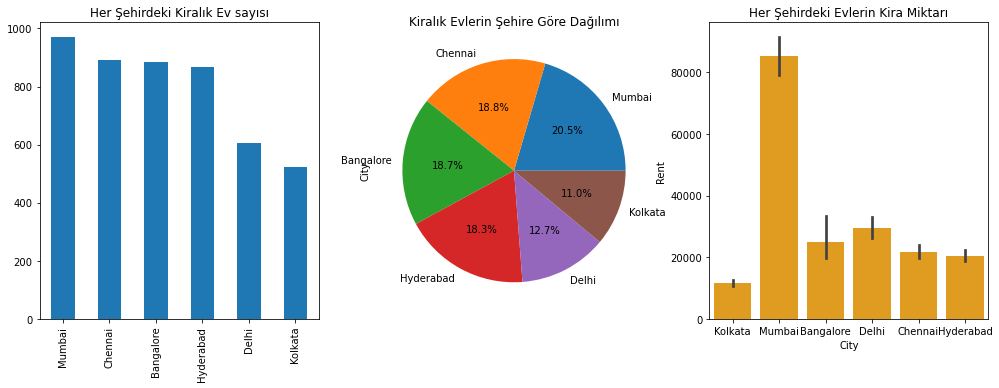

In [139]:
plt.figure(figsize= (17,12))
plt.subplot(2,3,1)
plt.title("Her Şehirdeki Kiralık Ev sayısı")
df_rent["City"].value_counts().plot(kind = "bar");

plt.subplot(2,3,2)
plt.title("Kiralık Evlerin Şehire Göre Dağılımı")
df_rent["City"].value_counts().plot(kind = "pie",  autopct = '%1.1f%%');

plt.subplot(2,3,3)
plt.title("Her Şehirdeki Evlerin Kira Miktarı")
sns.barplot(x="City", y="Rent",color="Orange" , data=df_rent);

plt.show()

City değişkenini üç ayrı grafik altında ayrı olarak incelemek istedim. Her şehirde en az 500 tane kiralık ev bulunuyor. 20 milyondan fazla nüfusu bulunan metropol Mumbai'de kiralık daire sayısı nüfusla da orantılı olacak şekilde bir hayli fazla. Mumbai'yi sırasıyla Chennai, Bangalore ve Hyderabad şehirleri takip ediyor. Bu üç şehirin pasta grafiği yardımıyla dağılım oranlarını inceleyecek olursak birbirlerine çok yakın değerler olduğunu gözlemleyebiliyoruz. Kiralık ev sayısı en az olan Kolkata incelendiğinde 2022 itibariyle 15 milyon nüfusa sahip olan bu şehrin potansiyeli incelendiğinde 500 gibi bir sayı bana az geldi açıkçası. Bunun nedeni belki de şehrin coğrafi/siyasi yapısı ile de ilgili olabilir.  

City değişkeni hakkındaki üçüncü ve son grafiğimizde de Kira ile Şehir arasındaki bağlantıyı gözlemlemek istenmiştir.Kiralık ev sayısının en çok olduğu Mumbai metropolünün kira ortalamalarının oldukça fazla olduğu da görülmektedir.

In [140]:
df_rent.head(15)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2,7000,600,Ground out of 1,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2,10000,700,Ground out of 4,Super Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,1,5000,250,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2,26000,800,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2,10000,1000,1 out of 3,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


### Lebal Encoder

In [141]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [142]:
df_rent["contact_lebal_encoder"] = label_encoder.fit_transform(df_rent["Point of Contact"])

In [143]:
df_rent.head(15)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,contact_lebal_encoder
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2
5,2,7000,600,Ground out of 1,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
6,2,10000,700,Ground out of 4,Super Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent,0
7,1,5000,250,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors,1,Contact Agent,0
8,2,26000,800,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,2,Contact Agent,0
9,2,10000,1000,1 out of 3,Carpet Area,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner,2


### One-Hot Encoding

In [144]:
onehotencoder = preprocessing.OneHotEncoder()

In [145]:
df_rent["Area Type"] = pd.Categorical(df_rent["Area Type"])
df_area = pd.get_dummies(df_rent["Area Type"], prefix = "Area")
df_area

,Area_Built Area,Area_Carpet Area,Area_Super Area
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4741,0,1,0
4742,0,0,1
4743,0,1,0
4744,0,1,0


In [146]:
df_rent = pd.concat([df_rent, df_area], axis=1)
df_rent

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,contact_lebal_encoder,Area_Built Area,Area_Carpet Area,Area_Super Area
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,0,0,1
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2,0,0,1
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2,0,0,1
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,0,0,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2,0,1,0
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2,0,0,1
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0,0,1,0
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0,0,1,0


In [147]:
df_rent["City"] = pd.Categorical(df_rent["City"])
df_city = pd.get_dummies(df_rent["City"], prefix = "City")
df_city

,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
4741,0,0,0,1,0,0
4742,0,0,0,1,0,0
4743,0,0,0,1,0,0
4744,0,0,0,1,0,0


In [148]:
df_rent = pd.concat([df_rent, df_city], axis=1)
df_rent

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,contact_lebal_encoder,Area_Built Area,Area_Carpet Area,Area_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2,0,0,1,0,0,0,0,1,0
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2,0,0,1,0,0,0,0,1,0
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,2,0,0,1,0,0,0,0,1,0
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2,0,0,1,0,0,0,0,1,0
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,2,0,1,0,0,0,0,1,0,0
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,2,0,0,1,0,0,0,1,0,0
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,0,0,1,0,0,0,0,1,0,0
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,0,0,1,0,0,0,0,1,0,0


In [149]:
df_rent["Furnishing Status"] = pd.Categorical(df_rent["Furnishing Status"])
df_furn = pd.get_dummies(df_rent["Furnishing Status"], prefix = "Furnishing")
df_rent = pd.concat([df_rent, df_furn], axis=1)
df_rent

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,...,Area_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,...,1,0,0,0,0,1,0,0,0,1
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,...,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,0,0,0,0,1,0,0,0,1,0
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,1,0,0,0,1,0,0,0,1,0
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,0,0,0,0,1,0,0,0,1,0
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,...,0,0,0,0,1,0,0,0,1,0


In [150]:
df_rent["Tenant Preferred"] = pd.Categorical(df_rent["Tenant Preferred"])
df_pref = pd.get_dummies(df_rent["Tenant Preferred"], prefix = "Preferred")
df_rent = pd.concat([df_rent, df_pref], axis=1)
df_rent

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Preferred_Bachelors,Preferred_Bachelors/Family,Preferred_Family
0,2,10000,1100,Ground out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,...,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1 out of 3,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1 out of 2,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,...,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1 out of 2,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,0,1,0,0,0,1,0,0,1,0
4742,3,29000,2000,1 out of 4,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,...,0,1,0,0,0,1,0,0,1,0
4743,3,35000,1750,3 out of 5,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,...,0,1,0,0,0,1,0,0,1,0
4744,3,45000,1500,23 out of 34,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,...,0,1,0,0,0,1,0,0,0,1


## AYKIRI DEĞERLER


In [151]:
def iqr_with_finding_outliers(data):

    if not isinstance(data, pd.Series):
        raise TypeError("data parameter that came must be Pandas.Series format")
    
    print("IQR process started")
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
     
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print("'" , data.name , "' kolumunun değerleri")
    print("Lower bound:", lower_bound)
    print("Upper bound", upper_bound)
    print("IQR proces finished succesfully")
    
    return lower_bound, upper_bound

In [152]:
iqr_with_finding_outliers(df_rent['BHK'])

IQR process started
' BHK ' kolumunun değerleri
Lower bound: 0.5
Upper bound 4.5
IQR proces finished succesfully


(0.5, 4.5)

In [153]:
iqr_with_finding_outliers(df_rent['Bathroom'])

IQR process started
' Bathroom ' kolumunun değerleri
Lower bound: -0.5
Upper bound 3.5
IQR proces finished succesfully


(-0.5, 3.5)

In [157]:
iqr_with_finding_outliers(df_rent['Size'])

IQR process started
' Size ' kolumunun değerleri
Lower bound: -425.0
Upper bound 2175.0
IQR proces finished succesfully


(-425.0, 2175.0)

In [155]:
iqr_with_finding_outliers(df_rent['Rent'])

IQR process started
' Rent ' kolumunun değerleri
Lower bound: -24500.0
Upper bound 67500.0
IQR proces finished succesfully


(-24500.0, 67500.0)

Sırasıyla "BHK , Bathroom , Size , Rent" kolumlarını inceleyerek alt ve üst sınırlarını kontrol ettim.

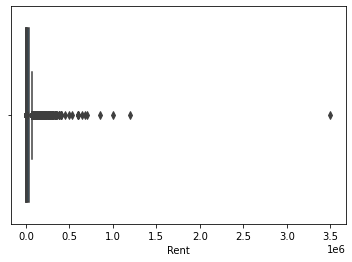

In [156]:
sns.boxplot(df_rent["BHK"])
sns.boxplot(df_rent["Bathroom"])
sns.boxplot(df_rent["Size"])
sns.boxplot(df_rent["Rent"])
plt.show()